In [1]:
import cv2
import os
import random
import numpy as np

# Path to the directory containing the image folders on Google Drive
# base_path = "/content/drive/My Drive/archive"

base_path = "/Users/mrbinit/Downloads/preprocessed/"

# List to store all image file paths and corresponding labels
image_paths = []
labels = []

# Function to recursively find all image files in a directory and assign labels
def find_image_files(directory, label):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check for image file formats
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_paths.append(os.path.join(root, file))
                labels.append(label)  # Assign label to the corresponding image

# Find image files in the 'fake-v2' folder
fake_v2_path = os.path.join(base_path, "fake")
find_image_files(fake_v2_path, label=1)  # Assign label 1 for AI-generated images

# Find image files in the 'real' folder
real_path = os.path.join(base_path, "real")
find_image_files(real_path, label=0)  # Assign label 0 for hand-made images

# Shuffle the image paths and labels in parallel
combined_data = list(zip(image_paths, labels))
random.shuffle(combined_data)
image_paths, labels = zip(*combined_data)

# Convert labels to numpy array for easier handling
labels = np.array(labels)

# Display the number of images and labels loaded
print(f"Total images: {len(image_paths)}")
print(f"Total labels: {len(labels)}")



Total images: 2163
Total labels: 2163


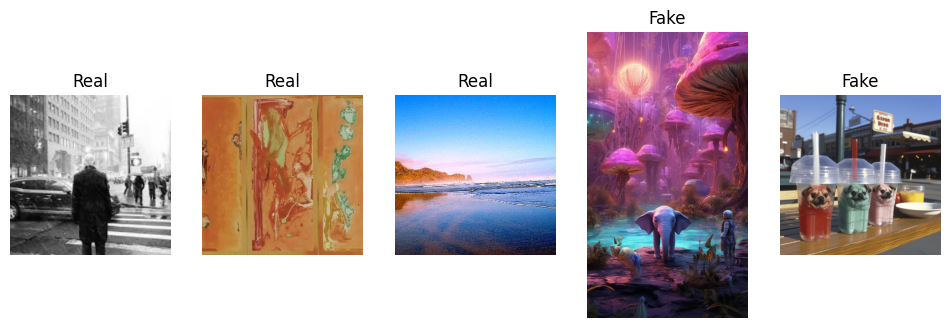

In [9]:
import matplotlib.pyplot as plt
# Function to display a random subset of images with labels
def display_images(image_paths, labels, num_images= 5):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        # Randomly select an image index
        idx = random.randint(0, len(image_paths) - 1)
        image_path = image_paths[idx]
        label = labels[idx]
        
        # Load and display the image using OpenCV
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title("Fake" if label == 1 else "Real")  # Display label
        plt.axis("off")
    plt.show()

# Display a random subset of images with their labels
num_images_to_display = 5
display_images(image_paths, labels, num_images=num_images_to_display)

In [2]:
import tensorflow as tf
import numpy 
img_augmentation_layers = [
    tf.keras.layers.RandomRotation(factor = 0.15),
    tf.keras.layers.RandomTranslation(height_factor = 0.1, width_factor = 0.1),
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomContrast(factor = 0.1),
]

def apply_image_augmentation(image):
    #convert image to tensorflow tensor
    image = tf.convert_to_tensor(image) # converting the input image to  tensor for compatibility wiht tensorflow operation and could be processed efficiently with tnesorflow API
    
    #apply each augmentation layer sequentially
    for layer in img_augmentation_layers:
        image = layer(image)
    #convert back to numpy array
    augmented_image = image.numpy() 
    return augmented_image

/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
def display_images(image_paths, labels, num_images=5):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        # Randomly select an image index
        idx = random.randint(0, len(image_paths) - 1)
        image_path = image_paths[idx]
        label = labels[idx]
        
        # Load original image using OpenCV
        original_image = cv2.imread(image_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        
        # Apply augmentation to the original image
        augmented_image = apply_image_augmentation(original_image)
        
        # Plot original and augmented images side by side
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_image)
        plt.title("Original")
        plt.axis("off")
        
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(augmented_image.astype(np.uint8))  # Ensure image is in uint8 format for plotting
        plt.title("Augmented")
        plt.axis("off")
    
    plt.show()


Note: In the uint8 format, pixel values range from 0 to 255, representing the full range of possible color intensities for each channel (0 for minimum intensity, 255 for maximum intensity).

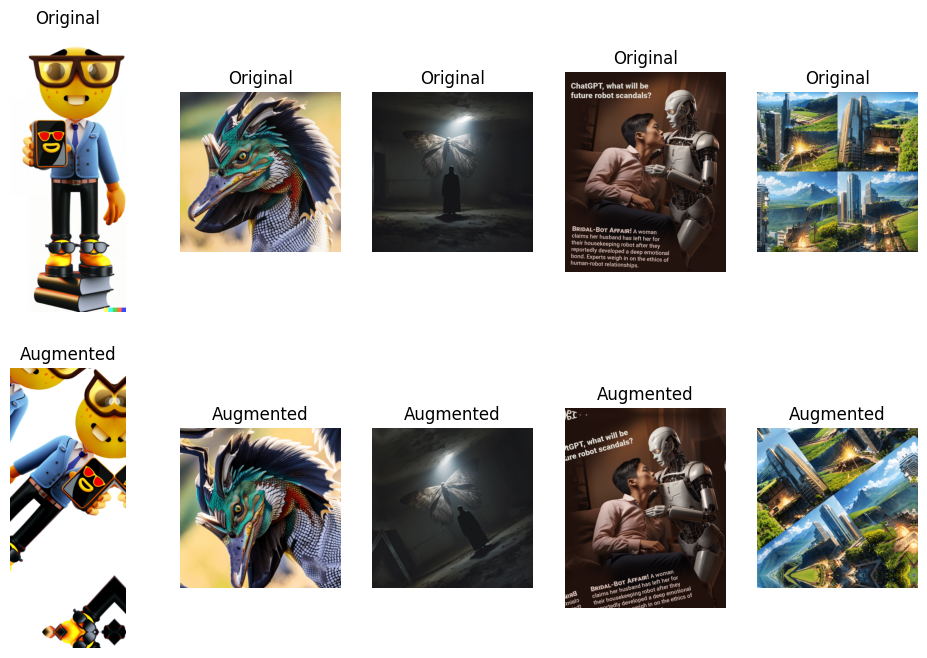

In [11]:
# Display a random subset of original and augmented images
num_images_to_display = 5
display_images(image_paths, labels, num_images=num_images_to_display)